### Read-in downloaded data

In [1]:
import pandas as pd

In [2]:
raw = pd.read_csv("csv/2021-09-23.csv", index_col = False)

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326586 entries, 0 to 5326585
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   viewer_id              object 
 1   broadcaster_id         object 
 2   viewer_age             float64
 3   viewer_gender          object 
 4   viewer_longitude       float64
 5   viewer_latitude        float64
 6   viewer_lang            object 
 7   viewer_country         object 
 8   broadcaster_age        float64
 9   broadcaster_gender     object 
 10  broadcaster_longitude  float64
 11  broadcaster_latitude   float64
 12  broadcaster_lang       object 
 13  broadcaster_country    object 
 14  duration               int64  
 15  viewer_network         object 
 16  broadcaster_network    object 
dtypes: float64(6), int64(1), object(10)
memory usage: 690.9+ MB


In [4]:
data = raw.sample(frac = 0.1)

In [5]:
data.head()

,viewer_id,broadcaster_id,viewer_age,viewer_gender,viewer_longitude,viewer_latitude,viewer_lang,viewer_country,broadcaster_age,broadcaster_gender,broadcaster_longitude,broadcaster_latitude,broadcaster_lang,broadcaster_country,duration,viewer_network,broadcaster_network
3588302,6b 3a 66 b2 85 9c 9d 0d 18 20 58 98 e7 66 87 42,12 6f 33 3b 5c d5 92 93 0b 83 77 95 65 bf 97 23,29.0,male,-117.412800,35.0998,en,US,23.0,female,101.3957,14.6619,en,TH,86,meetme,meetme
1562095,78 3b 78 5a 07 5a 88 65 5a 1b f2 d4 70 e3 16 42,0c 0f 34 9d a3 db 62 8c 22 2e bf b0 d7 ad 5d 27,25.0,male,-82.447998,29.0620,es,US,27.0,female,-81.4593,29.0552,en,US,99,skout,meetme
4163834,6b ca ca 75 ae 55 2f 2e 72 97 cf ee 68 02 c8 1d,7a c1 a2 66 10 06 30 5b 17 ee 1f ba b3 9d 68 fe,50.0,male,-82.200000,43.4000,en,US,26.0,female,-82.2000,43.4000,en,US,590,pof,pof
864591,51 9c 65 e5 1b 64 4f e7 15 9d 03 a9 07 d5 59 f7,a1 c2 df a0 57 c5 8e 57 a7 27 5d a9 c1 b6 35 87,34.0,male,-73.875600,42.6433,en,US,51.0,female,-118.2393,35.0634,en,US,2681,meetme,meetme
4161195,b5 03 36 3d d0 bf 04 1f f4 dc 49 72 77 68 a1 18,4f 4d 04 2e 0d cf f7 bd bd a9 34 a3 12 be 76 98,43.0,male,-98.000000,19.6000,en,US,58.0,female,-72.5116,6.6987,es,CO,619,pof,meetme


### Data Inspections

In [6]:
data_meta = pd.DataFrame(data.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_meta.columns = ['name','num']
data_meta['type'] = 'categorical'

In [7]:
data_meta

,name,num,type
0,broadcaster_gender,2,categorical
1,viewer_gender,2,categorical
2,broadcaster_network,4,categorical
3,viewer_network,4,categorical
4,broadcaster_lang,23,categorical
5,viewer_lang,53,categorical
6,broadcaster_age,91,categorical
7,viewer_age,108,categorical
8,viewer_country,159,categorical
9,broadcaster_country,169,categorical


In [8]:
# data_meta.loc[(data_meta['num']<=15),'type']='categorical'
data_meta.loc[data_meta['name'].isin(['viewer_age', 'broadcaster_age', 'duration', 'age', 'viewer_latitude', 'viewer_longitude', 'broadcaster_longitude', 'broadcaster_latitude']),'type']='numerical'

In [9]:
cat_features = list(data_meta.loc[data_meta['type']=='categorical','name'])
num_features = list(data_meta.loc[data_meta['type']=='numerical','name'])

In [10]:
cat_features

['broadcaster_gender',
 'viewer_gender',
 'broadcaster_network',
 'viewer_network',
 'broadcaster_lang',
 'viewer_lang',
 'viewer_country',
 'broadcaster_country',
 'broadcaster_id',
 'viewer_id']

In [11]:
num_features

['broadcaster_age',
 'viewer_age',
 'duration',
 'broadcaster_latitude',
 'broadcaster_longitude',
 'viewer_latitude',
 'viewer_longitude']

In [12]:
pd.crosstab(data['viewer_network'], data['broadcaster_network'])/(pd.crosstab(data['duration'], data['broadcaster_network']).sum())

broadcaster_network,meetme,pof,skout,zoosk
viewer_network,,,,
meetme,0.470772,0.295229,0.386861,0.415438
pof,0.287767,0.574654,0.145584,0.400694
skout,0.229715,0.120145,0.461813,0.158716
zoosk,0.011746,0.009972,0.005742,0.025152


In [13]:
data['duration'].describe()

count    532659.000000
mean        813.222219
std        3426.401108
min          46.000000
25%          91.000000
50%         169.000000
75%         457.000000
max      377999.000000
Name: duration, dtype: float64

### Viewer age

In [14]:
from sklearn.preprocessing import scale,RobustScaler,StandardScaler, MinMaxScaler

In [15]:
data['viewer_age'].describe()

count    532659.000000
mean         34.193278
std           9.768553
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         200.000000
Name: viewer_age, dtype: float64

### Uniform Buckets

In [16]:
def age_bucket(age):
    # min(age) = 18
    if age < 25:
        return 1
    elif age < 30:
        return 2
    elif age < 35:
        return 3
    elif age < 40:
        return 4
    elif age < 45:
        return 5
    elif age < 50:
        return 6
    elif age < 55:
        return 7
    elif age < 60:
        return 8
    elif age < 65:
        return 9
    else:
        return 10

In [17]:
data['viewer_age_bucket'] = data['viewer_age'].apply(lambda x: age_bucket(x))

In [18]:
import seaborn as sns

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10), dpi= 80)
# Add N Obs inside boxplot (optional)
def add_n_obs(df, group_col, y):
    medians_dict = {grp[0]-1 : grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        (plt.text(x, medians_dict[x]*1.10, '{:,}'.format(n_ob), 
                  horizontalalignment='center', fontdict={'size':14}, color='white'))

<Figure size 1200x800 with 0 Axes>

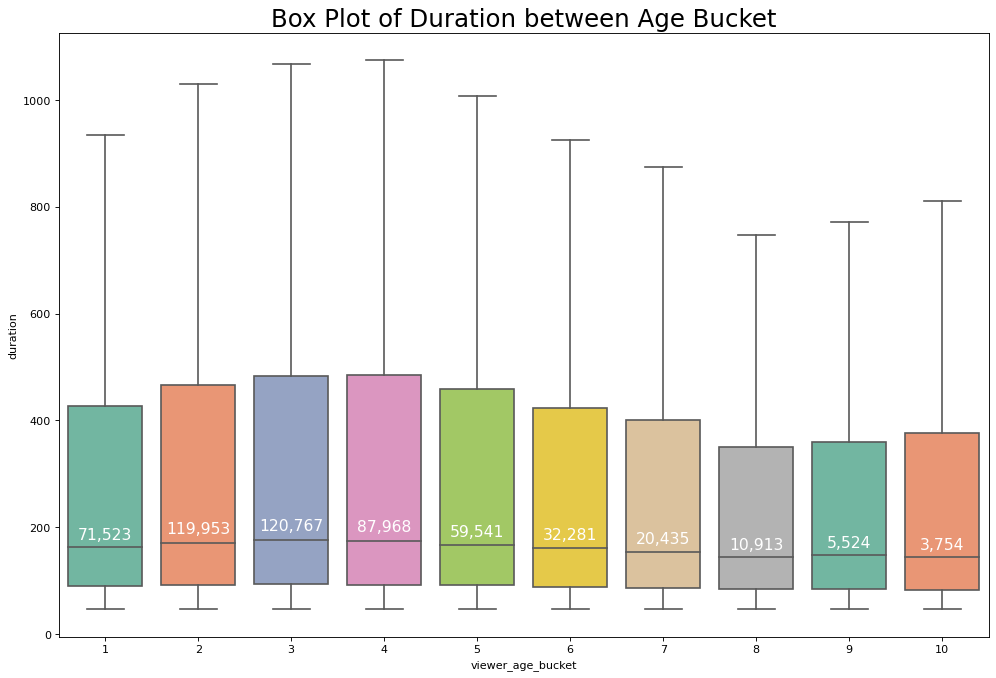

In [20]:
plt.figure(figsize=(15,10), dpi= 80)

sns.boxplot(x='viewer_age_bucket', y='duration', data=data, notch=False, showfliers=False, palette="Set2")
add_n_obs(data, group_col='viewer_age_bucket',y='duration')    

# Decoration
plt.title('Box Plot of Duration between Age Bucket', fontsize=22)
plt.show()

### KBinsDiscretizer

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

# with 10 bins
est = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='ordinal')
data['viewer_age_bucket_kbinsdiscretizer'] = est.fit_transform(data['viewer_age'].values.reshape(-1, 1))
data['viewer_age_bucket_kbinsdiscretizer']

3588302    0.0
1562095    0.0
4163834    1.0
864591     0.0
4161195    1.0
          ... 
1886002    1.0
4381539    0.0
1967407    0.0
4102957    0.0
867049     0.0
Name: viewer_age_bucket_kbinsdiscretizer, Length: 532659, dtype: float64

In [23]:
data[['viewer_age', 'viewer_age_bucket_kbinsdiscretizer']].describe()

,viewer_age,viewer_age_bucket_kbinsdiscretizer
count,532659.000000,532659.000000
mean,34.193278,0.379821
std,9.768553,0.576795
min,18.000000,0.000000
25%,27.000000,0.000000
50%,32.000000,0.000000
75%,39.000000,1.000000
max,200.000000,9.000000


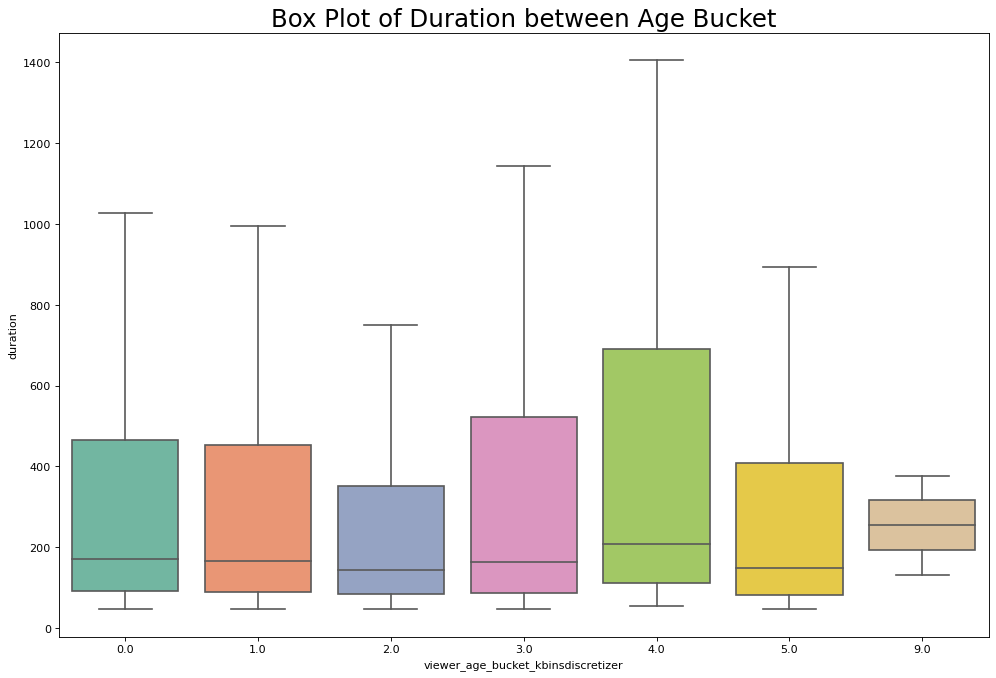

In [24]:
plt.figure(figsize=(15,10), dpi= 80)

sns.boxplot(x='viewer_age_bucket_kbinsdiscretizer', y='duration', data=data, notch=False, showfliers=False, palette="Set2")
# add_n_obs(data, group_col='viewer_age_bucket_kbinsdiscretizer', y='duration')    

# Decoration
plt.title('Box Plot of Duration between Age Bucket', fontsize=22)
plt.show()

In [25]:
est = KBinsDiscretizer(n_bins=10, encode='onehot', strategy='uniform')

In [29]:
est.fit_transform(data['viewer_age'].values.reshape(-1, 1))

<532659x10 sparse matrix of type '<class 'numpy.float64'>'
	with 532659 stored elements in Compressed Sparse Row format>

In [73]:
est = KBinsDiscretizer(n_bins=10, encode='onehot-dense', strategy='uniform')

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [30]:
est.fit_transform(data['viewer_age'].values.reshape(-1, 1))

<532659x10 sparse matrix of type '<class 'numpy.float64'>'
	with 532659 stored elements in Compressed Sparse Row format>

### Model Comparison

In [1]:
import os
import logging
import time

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_recommenders as tfrs

In [2]:
def get_broadcaster_data_set(train_ds):
    broadcasters = train_ds.cache().map(lambda x: x["broadcaster"], num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)
    broadcasters_ds = tf.data.Dataset.from_tensor_slices(
        np.unique(list(broadcasters.as_numpy_iterator())))
    return broadcasters_ds


def get_list(training_data, key):
    return training_data.batch(1_000_000).map(lambda x: x[key], num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)


def get_unique_list(data):
    return np.unique(np.concatenate(list(data)))


def load_training_data_cold(file, stats):
    ratings_df = load_data_file_cold(file, stats)
    print('creating data set')
    training_ds = (
        tf.data.Dataset.from_tensor_slices(
            ({
                "viewer": tf.cast(
                    ratings_df['viewer'].values,
                    tf.string),
                "viewer_gender": tf.cast(
                    ratings_df['viewer_gender'].values,
                    tf.string),
                "viewer_lang": tf.cast(
                    ratings_df['viewer_lang'].values,
                    tf.string),
                "viewer_country": tf.cast(
                    ratings_df['viewer_country'].values,
                    tf.string),
                "viewer_age": tf.cast(
                    ratings_df['viewer_age'].values,
                    tf.int16),
                "viewer_longitude": tf.cast(
                    ratings_df['viewer_longitude'].values,
                    tf.float16),
                "viewer_latitude": tf.cast(
                    ratings_df['viewer_latitude'].values,
                    tf.float16),
                "broadcaster": tf.cast(
                    ratings_df['broadcaster'].values,
                    tf.string),
                "viewer_network": tf.cast(
                    ratings_df['viewer_network'].values,
                    tf.string),
                "broadcaster_network": tf.cast(
                    ratings_df['broadcaster_network'].values,
                    tf.string),
            })))

    return training_ds

def load_data_file_cold(file, stats):
    print('loading file:' + file)
    training_df = pd.read_csv(
        file,
        skiprows=[0],
        names=["viewer","broadcaster","viewer_age","viewer_gender","viewer_longitude","viewer_latitude","viewer_lang","viewer_country","broadcaster_age","broadcaster_gender","broadcaster_longitude","broadcaster_latitude","broadcaster_lang","broadcaster_country","duration", "viewer_network", "broadcaster_network", "count"], dtype={
            'viewer': np.unicode,
            'broadcaster': np.unicode,
            'viewer_age': np.single,
            'viewer_gender': np.unicode,
            'viewer_longitude': np.single,
            'viewer_latitude': np.single,
            'viewer_lang': np.unicode,
            'viewer_country': np.unicode,
            'broadcaster_age': np.single,
            'broadcaster_longitude': np.single,
            'broadcaster_latitude': np.single,
            'broadcaster_lang': np.unicode,
            'broadcaster_country': np.unicode,
            'viewer_network': np.unicode,
            'broadcaster_network': np.unicode,
            'count': np.int
        })

    values = {
        'viewer': 'unknown',
        'broadcaster': 'unknown',
        'viewer_age': 30,
        'viewer_gender': 'unknown',
        'viewer_longitude': 0,
        'viewer_latitude': 0,
        'viewer_lang': 'unknown',
        'viewer_country': 'unknown',
        'broadcaster_age': 30,
        'broadcaster_longitude': 0,
        'broadcaster_latitude': 0,
        'broadcaster_lang': 'unknown',
        'broadcaster_country': 'unknown',
        'duration': 0,
        'viewer_network': 'unknown',
        'broadcaster_network': 'unknown',
        'count': 0
    }
    training_df.fillna(value=values, inplace=True)
    print(training_df.head(10))
    print(training_df.iloc[-10:])
    # stats.send_stats('data-size', len(training_df.index))
    samples = training_df.sample(frac=.1)
    return samples


def load_training_data_cold(file, stats):
    ratings_df = load_data_file_cold(file, stats)
    print('creating data set')
    training_ds = (
        tf.data.Dataset.from_tensor_slices(
            ({
                "viewer": tf.cast(
                    ratings_df['viewer'].values,
                    tf.string),
                "viewer_gender": tf.cast(
                    ratings_df['viewer_gender'].values,
                    tf.string),
                "viewer_lang": tf.cast(
                    ratings_df['viewer_lang'].values,
                    tf.string),
                "viewer_country": tf.cast(
                    ratings_df['viewer_country'].values,
                    tf.string),
                "viewer_age": tf.cast(
                    ratings_df['viewer_age'].values,
                    tf.int32),
                "viewer_longitude": tf.cast(
                    ratings_df['viewer_longitude'].values,
                    tf.float16),
                "viewer_latitude": tf.cast(
                    ratings_df['viewer_latitude'].values,
                    tf.float16),
                "broadcaster": tf.cast(
                    ratings_df['broadcaster'].values,
                    tf.string),
                "viewer_network": tf.cast(
                    ratings_df['viewer_network'].values,
                    tf.string),
                "broadcaster_network": tf.cast(
                    ratings_df['broadcaster_network'].values,
                    tf.string),
            })))

    return training_ds


def prepare_training_data_cold(train_ds):
    print('prepare_training_data')
    training_ds = train_ds.cache().map(lambda x: {
        "broadcaster": x["broadcaster"],
        "viewer": x["viewer"],
        "viewer_gender": x["viewer_gender"],
        "viewer_lang": x["viewer_lang"],
        "viewer_country": x["viewer_country"],
        "viewer_age": x["viewer_age"],
        "viewer_longitude": x["viewer_longitude"],
        "viewer_latitude": x["viewer_latitude"],
        "viewer_network": x["viewer_network"],
        "broadcaster_network": x["broadcaster_network"],
    }, num_parallel_calls=tf.data.AUTOTUNE,
       deterministic=False)

    print('done prepare_training_data')
    return training_ds


def current_milli_time():
    return round(time.time() * 1000)


### Read-in data

In [3]:
print("training_process")
start_time = current_milli_time()
broadcaster_embedding_dimension = 32
viewer_embedding_dimension = 32

batch_size = 1638
learning_rate = 0.05
epochs = 10
top_k = 199

training_process


In [4]:
training_dataset = load_training_data_cold("csv/a3d86f3b-eb45-4641-b05d-30dff7423e6b.csv", "")
train = prepare_training_data_cold(training_dataset)
broadcasters_data_set = get_broadcaster_data_set(training_dataset)

loading file:csv/a3d86f3b-eb45-4641-b05d-30dff7423e6b.csv
             viewer       broadcaster  viewer_age viewer_gender  \
0   meetme:19714617  meetme:242525021        39.0        female   
1   skout:161675320   skout:167570679        46.0          male   
2     pof:333093026      pof:77411971        28.0          male   
3     pof:324991301     pof:207032171        39.0          male   
4   skout:177541297  meetme:316500815        41.0          male   
5  meetme:258247855  meetme:314497940        36.0          male   
6    meetme:8237459  meetme:213050479        52.0          male   
7   meetme:84182876   skout:175969618        32.0          male   
8   skout:176797432  meetme:309441196        51.0          male   
9  meetme:282314746  meetme:226200204        32.0          male   

   viewer_longitude  viewer_latitude viewer_lang viewer_country  \
0       -118.380096        34.093899          en             US   
1        120.963997        14.693000          en             GB   
2  

2021-09-29 12:07:10.604110: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


prepare_training_data
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
done prepare_training_data
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team.

2021-09-29 12:07:11.117940: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [5]:
print("get lists")

user_genders = get_list(train, "viewer_gender")
user_langs = get_list(train, "viewer_lang")
user_countries = get_list(train, "viewer_country")
user_networks = get_list(train, "viewer_network")

viewer_age = get_list(train, "viewer_age")
viewer_longitude = get_list(train, "viewer_longitude")
viewer_latitude = get_list(train, "viewer_latitude")

broadcaster_ids = get_list(train, "broadcaster")

data_set_size = len(broadcaster_ids)

get lists
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity

In [6]:
print("get_unique_list")
unique_broadcasters = get_unique_list(broadcaster_ids)
unique_user_genders = get_unique_list(user_genders)
unique_user_langs = get_unique_list(user_langs)
unique_user_countries = get_unique_list(user_countries)
unique_user_networks = get_unique_list(user_networks)
print(unique_broadcasters)

get_unique_list
[b'meetme:100081867' b'meetme:100104254' b'meetme:100114731' ...
 b'zoosk:faa44d7ec2ee93a7acfb6bd4fb051767'
 b'zoosk:fd7a32868c43ed589efba6653949426c'
 b'zoosk:ffd69ee0bb59b722020f374298b9e0b9']


In [7]:
 print("unique broadcasters: " + str(len(unique_broadcasters)))

unique broadcasters: 69798


In [22]:
class UserModel(tf.keras.Model) :

    def __init__(self, unique_genders, unique_langs, unique_countries, viewer_age, unique_networks) :
        super().__init__()

        self.gender_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_genders, mask_token=None),
            tf.keras.layers.Embedding(len(unique_genders) + 1, 4),
        ])

        self.lang_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_langs, mask_token=None),
            tf.keras.layers.Embedding(len(unique_langs) + 1, 11),
        ])

        self.country_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_countries, mask_token=None),
            tf.keras.layers.Embedding(len(unique_countries) + 1, 11),
        ])

        self.network_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_networks, mask_token=None),
            tf.keras.layers.Embedding(len(unique_networks) + 1, 5),
        ])

        self.normalized_ages = tf.keras.layers.experimental.preprocessing.Normalization(axis=None)
        self.normalized_ages.adapt(viewer_age)


    def call(self, inputs) :
        return tf.concat([
            self.gender_embedding(inputs["viewer_gender"]),
            self.lang_embedding(inputs["viewer_lang"]),
            self.country_embedding(inputs["viewer_country"]),
            self.network_embedding(inputs["viewer_network"]),
            tf.reshape(self.normalized_ages(inputs["viewer_age"]), (-1, 1))
        ], axis = 1)

In [23]:
user_model = UserModel(unique_user_genders, unique_user_langs, unique_user_countries, viewer_age, unique_user_networks)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [24]:
class BroadcasterModel(tf.keras.Model):

    def __init__(self, unique_broadcaster_titles, dims):
        super().__init__()

        self.broadcaster_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_broadcaster_titles, mask_token=None),
            tf.keras.layers.Embedding(len(unique_broadcaster_titles) + 1, dims)
        ])

    def call(self, broadcaster):
        return tf.concat([
            self.broadcaster_embedding(broadcaster),
        ], axis=1)

In [25]:
broadcaster_model = BroadcasterModel(
    unique_broadcasters,
    broadcaster_embedding_dimension)

In [26]:
metrics = tfrs.metrics.FactorizedTopK(
    candidates=broadcasters_data_set.batch(128).map(broadcaster_model)
)

task = tfrs.tasks.Retrieval(
    metrics=metrics
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [27]:
from typing import Dict, Text

class TwoTowers(tf.keras.Model):

    def __init__(self, broadcaster_model, user_model, task):
        super().__init__()
        self.broadcaster_model: tf.keras.Model = broadcaster_model
        self.embedding_model = user_model
        self.task: tf.keras.layers.Layer = task

    def train_step(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:

        # Set up a gradient tape to record gradients.
        with tf.GradientTape() as tape:

            # Loss computation.

            user_embeddings = self.embedding_model({
                "viewer_gender": features["viewer_gender"],
                "viewer_lang": features["viewer_lang"],
                "viewer_country": features["viewer_country"],
                "viewer_age": features["viewer_age"],
                "viewer_network": features["viewer_network"],
                "viewer_latitude": features["viewer_latitude"],
                "viewer_longitude": features["viewer_longitude"]
            })
            positive_broadcaster_embeddings = self.broadcaster_model(
                features["broadcaster"])
            loss = self.task(user_embeddings, positive_broadcaster_embeddings)

            # Handle regularization losses as well.
            regularization_loss = sum(self.losses)

            total_loss = loss + regularization_loss

        gradients = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(
            zip(gradients, self.trainable_variables))

        metrics = {metric.name: metric.result() for metric in self.metrics}
        metrics["loss"] = loss
        metrics["regularization_loss"] = regularization_loss
        metrics["total_loss"] = total_loss

        return metrics

    def test_step(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:

        # Loss computation.

        user_embeddings = self.embedding_model({
                "viewer_gender": features["viewer_gender"],
                "viewer_lang": features["viewer_lang"],
                "viewer_country": features["viewer_country"],
                "viewer_age": features["viewer_age"],
                "viewer_network": features["viewer_network"],
                "viewer_latitude": features["viewer_latitude"],
                "viewer_longitude": features["viewer_longitude"]
        })
        positive_broadcaster_embeddings = self.broadcaster_model(
            features["broadcaster"])
        loss = self.task(user_embeddings, positive_broadcaster_embeddings)

        # Handle regularization losses as well.
        regularization_loss = sum(self.losses)

        total_loss = loss + regularization_loss

        metrics = {metric.name: metric.result() for metric in self.metrics}
        metrics["loss"] = loss
        metrics["regularization_loss"] = regularization_loss
        metrics["total_loss"] = total_loss
        return metrics

In [28]:
model = TwoTowers(broadcaster_model, user_model, task)

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(
        learning_rate=learning_rate))

In [30]:
tf.random.set_seed(42)
shuffled = train.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train_p80 = shuffled.take(80_000)
test_p20 = shuffled.skip(80_000).take(20_000)

cached_train = train_p80.shuffle(100_000).batch(2048)
cached_test = test_p20.batch(2048).cache()

In [31]:
old_model_history = model.fit(
    cached_train,
    validation_data=cached_test,
    validation_freq=5,
    epochs=10,
    verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

### New User Model with discretized age buckets

In [8]:
max_viewer_age = train.map(lambda x: x["viewer_age"]).reduce(tf.cast(0, tf.int32), tf.maximum).numpy().max()
age_boundaries = np.array([18, 25, 30, 35, 40, 45, 50, 55, 60, 65, max_viewer_age])

# Discretization
# max_viewer_age = train.map(lambda x: x["viewer_age"]).reduce(
#     tf.cast(0, tf.int32), tf.maximum).numpy().max()
# min_viewer_age = train.map(lambda x: x["viewer_age"]).reduce(
#     np.int32(100), tf.minimum).numpy().min()

# viewer_age_buckets = np.linspace(
#     min_viewer_age, max_viewer_age, num=10)

# print(f"Buckets: {viewer_age_buckets[:10]}")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [9]:
class UserModel(tf.keras.Model) :

    def __init__(self, unique_genders, unique_langs, unique_countries, viewer_age, unique_networks) :
        super().__init__()

        self.gender_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_genders, mask_token=None),
            tf.keras.layers.Embedding(len(unique_genders) + 1, 4),
        ])

        self.lang_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_langs, mask_token=None),
            tf.keras.layers.Embedding(len(unique_langs) + 1, 11),
        ])

        self.country_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_countries, mask_token=None),
            tf.keras.layers.Embedding(len(unique_countries) + 1, 11),
        ])

        self.network_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_networks, mask_token=None),
            tf.keras.layers.Embedding(len(unique_networks) + 1, 4),
        ])

#         self.normalized_ages = tf.keras.layers.experimental.preprocessing.Normalization(axis=None)
#         self.normalized_ages.adapt(viewer_age)
        
        self.viewer_age_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.Discretization(age_boundaries.tolist()),
            tf.keras.layers.Embedding(len(age_boundaries) + 2, 2)
        ])            


    def call(self, inputs) :
        return tf.concat([
            self.gender_embedding(inputs["viewer_gender"]),
            self.lang_embedding(inputs["viewer_lang"]),
            self.country_embedding(inputs["viewer_country"]),
            self.network_embedding(inputs["viewer_network"]),
            self.viewer_age_embedding(inputs["viewer_age"]),
        ], axis = 1)

In [10]:
user_model = UserModel(unique_user_genders, unique_user_langs, unique_user_countries, viewer_age, unique_user_networks)

In [12]:
class BroadcasterModel(tf.keras.Model):

    def __init__(self, unique_broadcaster_titles, dims):
        super().__init__()

        self.broadcaster_embedding = tf.keras.Sequential([
            tf.keras.layers.experimental.preprocessing.StringLookup(
                vocabulary=unique_broadcaster_titles, mask_token=None),
            tf.keras.layers.Embedding(len(unique_broadcaster_titles) + 1, dims)
        ])

    def call(self, broadcaster):
        return tf.concat([
            self.broadcaster_embedding(broadcaster),
        ], axis=1)

In [13]:
broadcaster_model = BroadcasterModel(unique_broadcasters, broadcaster_embedding_dimension)

In [14]:
from typing import Dict, Text

class TwoTowers(tf.keras.Model):

    def __init__(self, broadcaster_model, user_model, task):
        super().__init__()
        self.broadcaster_model: tf.keras.Model = broadcaster_model
        self.embedding_model = user_model
        self.task: tf.keras.layers.Layer = task

    def train_step(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:

        # Set up a gradient tape to record gradients.
        with tf.GradientTape() as tape:

            # Loss computation.

            user_embeddings = self.embedding_model({
                "viewer_gender": features["viewer_gender"],
                "viewer_lang": features["viewer_lang"],
                "viewer_country": features["viewer_country"],
                "viewer_age": features["viewer_age"],
                "viewer_network": features["viewer_network"],
                "viewer_latitude": features["viewer_latitude"],
                "viewer_longitude": features["viewer_longitude"]
            })
            positive_broadcaster_embeddings = self.broadcaster_model(
                features["broadcaster"])
            loss = self.task(user_embeddings, positive_broadcaster_embeddings)

            # Handle regularization losses as well.
            regularization_loss = sum(self.losses)

            total_loss = loss + regularization_loss

        gradients = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(
            zip(gradients, self.trainable_variables))

        metrics = {metric.name: metric.result() for metric in self.metrics}
        metrics["loss"] = loss
        metrics["regularization_loss"] = regularization_loss
        metrics["total_loss"] = total_loss

        return metrics

    def test_step(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:

        # Loss computation.

        user_embeddings = self.embedding_model({
                "viewer_gender": features["viewer_gender"],
                "viewer_lang": features["viewer_lang"],
                "viewer_country": features["viewer_country"],
                "viewer_age": features["viewer_age"],
                "viewer_network": features["viewer_network"],
                "viewer_latitude": features["viewer_latitude"],
                "viewer_longitude": features["viewer_longitude"]
        })
        positive_broadcaster_embeddings = self.broadcaster_model(
            features["broadcaster"])
        loss = self.task(user_embeddings, positive_broadcaster_embeddings)

        # Handle regularization losses as well.
        regularization_loss = sum(self.losses)

        total_loss = loss + regularization_loss

        metrics = {metric.name: metric.result() for metric in self.metrics}
        metrics["loss"] = loss
        metrics["regularization_loss"] = regularization_loss
        metrics["total_loss"] = total_loss
        return metrics

In [16]:
metrics = tfrs.metrics.FactorizedTopK(
    candidates=broadcasters_data_set.batch(128).map(broadcaster_model)
)

task = tfrs.tasks.Retrieval(
    metrics=metrics
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [17]:
model = TwoTowers(broadcaster_model, user_model, task)

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(
        learning_rate=learning_rate))

In [19]:
tf.random.set_seed(42)
shuffled = train.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train_p80 = shuffled.take(80_000)
test_p20 = shuffled.skip(80_000).take(20_000)

cached_train = train_p80.shuffle(100_000).batch(2048)
cached_test = test_p20.batch(2048).cache()

In [20]:
# model.fit(train_ds, epochs=epochs)
new_model_history = model.fit(
    cached_train,
    validation_data=cached_test,
    validation_freq=5,
    epochs=10,
    verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on

In [21]:
new_model_history.history

{'factorized_top_k/top_1_categorical_accuracy': [0.0006249999860301614,
  0.0012125000357627869,
  0.0017374999588355422,
  0.0015750000020489097,
  0.00215000007301569,
  0.0022124999668449163,
  0.0024125000927597284,
  0.00215000007301569,
  0.0021875000093132257,
  0.0025625000707805157],
 'factorized_top_k/top_5_categorical_accuracy': [0.0048374999314546585,
  0.007712500169873238,
  0.00860000029206276,
  0.01048749964684248,
  0.011075000278651714,
  0.010262499563395977,
  0.010599999688565731,
  0.011212499812245369,
  0.013175000436604023,
  0.014387499541044235],
 'factorized_top_k/top_10_categorical_accuracy': [0.00911249965429306,
  0.013500000350177288,
  0.015137500129640102,
  0.01913749985396862,
  0.01877499930560589,
  0.01771249994635582,
  0.018912499770522118,
  0.021375000476837158,
  0.024450000375509262,
  0.026225000619888306],
 'factorized_top_k/top_50_categorical_accuracy': [0.026775000616908073,
  0.043162498623132706,
  0.051362499594688416,
  0.0578625015

In [32]:
num_validation_runs = len(old_model_history.history["factorized_top_k/top_100_categorical_accuracy"])

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

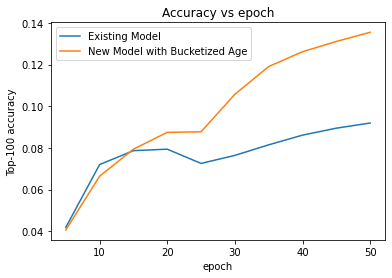

In [34]:
epochs = [(x + 1)* 5 for x in range(num_validation_runs)]

plt.plot(epochs, old_model_history.history["factorized_top_k/top_100_categorical_accuracy"], label="Existing Model")
plt.plot(epochs, new_model_history.history["factorized_top_k/top_100_categorical_accuracy"], label="New Model with Bucketized Age")
plt.title("Accuracy vs epoch")
plt.xlabel("epoch")
plt.ylabel("Top-100 accuracy");
plt.legend()

In [35]:
accuracy = old_model_history.history["factorized_top_k/top_100_categorical_accuracy"][-1]
print(f"Top-100 accuracy: {accuracy:.4f}.")

Top-100 accuracy: 0.0919.


In [36]:
accuracy = new_model_history.history["factorized_top_k/top_100_categorical_accuracy"][-1]
print(f"Top-100 accuracy: {accuracy:.4f}.")

Top-100 accuracy: 0.1355.
